<a href="https://colab.research.google.com/github/algharak/semi-demand-fcst/blob/master/experiments.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
%matplotlib inline
!pip install mxnet
import mxnet as mx
from mxnet import gluon
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import json
import os
from itertools import islice
from pathlib import Path


     |████████████████████████████████| 68.7MB 81kB/s 
  Found existing installation: graphviz 0.10.1
    Uninstalling graphviz-0.10.1:
      Successfully uninstalled graphviz-0.10.1


In [3]:
mx.random.seed(0)
np.random.seed(0)

In [4]:
!pip install gluonts

     |████████████████████████████████| 419kB 4.7MB/s 
     |████████████████████████████████| 194kB 14.6MB/s 
     |████████████████████████████████| 7.4MB 17.9MB/s 
  Created wheel for ujson: filename=ujson-1.35-cp36-cp36m-linux_x86_64.whl size=68022 sha256=c78fc7dbc3b76cfa24d960198420a9d3b420622fb0102b9bc22d1a3451925d32
  Stored in directory: /root/.cache/pip/wheels/28/77/e4/0311145b9c2e2f01470e744855131f9e34d6919687550f87d1
Successfully built ujson


In [5]:
from gluonts.dataset.repository.datasets import get_dataset, dataset_recipes
from gluonts.dataset.util import to_pandas
print(f"Available datasets: {list(dataset_recipes.keys())}")

Available datasets: ['constant', 'exchange_rate', 'solar-energy', 'electricity', 'traffic', 'exchange_rate_nips', 'electricity_nips', 'traffic_nips', 'solar_nips', 'wiki-rolling_nips', 'taxi_30min', 'm4_hourly', 'm4_daily', 'm4_weekly', 'm4_monthly', 'm4_quarterly', 'm4_yearly', 'm5']


In [7]:
dataset = get_dataset("m4_monthly", regenerate=True)

KeyboardInterrupt: ignored

In [6]:
train_entry = next(iter(dataset.train))
#train_entry = next(iter(dataset.train))
aa = train_entry
print (aa['item_id'])
print(train_entry.keys())


NameError: ignored

In [ ]:
train_entry = next(iter(dataset.train))
test_entry = next(iter(dataset.test))
print(train_entry['target'].shape)

print(test_entry['target'].shape)
train_entry = next(iter(dataset.train))
test_entry = next(iter(dataset.test))
print(train_entry['target'].shape)

print(test_entry['target'].shape)


In [ ]:
print (type(dataset.metadata))
print (dataset.metadata)


In [ ]:
me=iter(dataset.train)
j = 1
for i in me:
  mef = to_pandas(i)
  print (j)
  print (mef.shape)
  j +=1
print ('i am donr')



In [ ]:

fig, ax = plt.subplots(2, 1, sharex=True, sharey=True, figsize=(10, 7))

train_series.plot(ax=ax[0])
ax[0].grid(which="both")
ax[0].legend(["train series"], loc="upper left")

test_series.plot(ax=ax[1])
ax[1].axvline(train_series.index[-1], color='r') # end of train dataset
ax[1].grid(which="both")
ax[1].legend(["test series", "end of train series"], loc="upper left")

plt.show()

In [9]:
from google.colab import files
uploaded = files.upload()

Saving Historical Product Demand Short.csv to Historical Product Demand Short.csv


In [10]:
import io
import pandas as pd

df2 = pd.read_csv(io.BytesIO(uploaded['Historical Product Demand Short.csv']),parse_dates=["Date"])
df2.head

<bound method NDFrame.head of         Product_Code Warehouse Product_Category       Date  Order_Demand
0       Product_0965    Whse_A     Category_006 2011-01-08             2
1       Product_1724    Whse_A     Category_003 2011-05-31           108
2       Product_1521    Whse_S     Category_019 2011-06-24         85000
3       Product_1521    Whse_S     Category_019 2011-06-24          7000
4       Product_1507    Whse_C     Category_019 2011-09-02          1250
...              ...       ...              ...        ...           ...
315919  Product_1616    Whse_S     Category_024 2013-07-12             1
315920  Product_1886    Whse_S     Category_007 2013-07-12          2000
315921  Product_1892    Whse_S     Category_021 2013-07-12             3
315922  Product_1025    Whse_S     Category_007 2013-07-12            20
315923  Product_1886    Whse_S     Category_007 2013-07-12          5000

[315924 rows x 5 columns]>

In [11]:
df2.shape

(315924, 5)

In [12]:
colnames = df2.columns.to_list()
print(type(colnames))
for i in colnames:
  print (i)

<class 'list'>
Product_Code
Warehouse
Product_Category
Date
Order_Demand


In [13]:
#print (pd.unique(df2['Product_Category']))
prod_categ = list(pd.unique(df2['Product_Category']))
print(type(prod_categ))
print(prod_categ)

<class 'list'>
['Category_006', 'Category_003', 'Category_019', 'Category_001', 'Category_023', 'Category_011', 'Category_007', 'Category_028', 'Category_009', 'Category_021', 'Category_004', 'Category_015', 'Category_024', 'Category_030', 'Category_026', 'Category_018', 'Category_032', 'Category_020', 'Category_013', 'Category_005', 'Category_022', 'Category_031', 'Category_010', 'Category_033', 'Category_017', 'Category_008', 'Category_029', 'Category_025', 'Category_012', 'Category_014', 'Category_002']


In [14]:
print (df2.head)
print (df2.info())

<bound method NDFrame.head of         Product_Code Warehouse Product_Category       Date  Order_Demand
0       Product_0965    Whse_A     Category_006 2011-01-08             2
1       Product_1724    Whse_A     Category_003 2011-05-31           108
2       Product_1521    Whse_S     Category_019 2011-06-24         85000
3       Product_1521    Whse_S     Category_019 2011-06-24          7000
4       Product_1507    Whse_C     Category_019 2011-09-02          1250
...              ...       ...              ...        ...           ...
315919  Product_1616    Whse_S     Category_024 2013-07-12             1
315920  Product_1886    Whse_S     Category_007 2013-07-12          2000
315921  Product_1892    Whse_S     Category_021 2013-07-12             3
315922  Product_1025    Whse_S     Category_007 2013-07-12            20
315923  Product_1886    Whse_S     Category_007 2013-07-12          5000

[315924 rows x 5 columns]>
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 315924 entries, 

In [15]:
start_date = df2['Date'].min()
end_date = df2['Date'].max()
print (start_date,end_date)
print (type(start_date),type(end_date))

2011-01-08 00:00:00 2013-07-12 00:00:00
<class 'pandas._libs.tslibs.timestamps.Timestamp'> <class 'pandas._libs.tslibs.timestamps.Timestamp'>


In [16]:
idx = pd.date_range(start=start_date, end=end_date)

In [17]:
dtdelta = end_date-start_date
nrows = dtdelta.days
print (type(nrows))
ncols = len (prod_categ)
print(nrows,ncols)

<class 'int'>
916 31


In [18]:
dfnew = pd.DataFrame(np.zeros((nrows+1,ncols),dtype=int),index=idx, columns=prod_categ)
dfnew.head

<bound method NDFrame.head of             Category_006  Category_003  ...  Category_014  Category_002
2011-01-08             0             0  ...             0             0
2011-01-09             0             0  ...             0             0
2011-01-10             0             0  ...             0             0
2011-01-11             0             0  ...             0             0
2011-01-12             0             0  ...             0             0
...                  ...           ...  ...           ...           ...
2013-07-08             0             0  ...             0             0
2013-07-09             0             0  ...             0             0
2013-07-10             0             0  ...             0             0
2013-07-11             0             0  ...             0             0
2013-07-12             0             0  ...             0             0

[917 rows x 31 columns]>

In [19]:
import datetime
cat_idx = colnames.index('Product_Category')
dt_idx = colnames.index('Date')
value_idx = colnames.index('Order_Demand')
print(cat_idx)
df2.info()

2
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 315924 entries, 0 to 315923
Data columns (total 5 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   Product_Code      315924 non-null  object        
 1   Warehouse         315924 non-null  object        
 2   Product_Category  315924 non-null  object        
 3   Date              315924 non-null  datetime64[ns]
 4   Order_Demand      315924 non-null  int64         
dtypes: datetime64[ns](1), int64(1), object(3)
memory usage: 12.1+ MB


In [20]:
print (dfnew.head)
print (type(dfnew.index[1]))

<bound method NDFrame.head of             Category_006  Category_003  ...  Category_014  Category_002
2011-01-08             0             0  ...             0             0
2011-01-09             0             0  ...             0             0
2011-01-10             0             0  ...             0             0
2011-01-11             0             0  ...             0             0
2011-01-12             0             0  ...             0             0
...                  ...           ...  ...           ...           ...
2013-07-08             0             0  ...             0             0
2013-07-09             0             0  ...             0             0
2013-07-10             0             0  ...             0             0
2013-07-11             0             0  ...             0             0
2013-07-12             0             0  ...             0             0

[917 rows x 31 columns]>
<class 'pandas._libs.tslibs.timestamps.Timestamp'>


In [21]:
from tqdm.notebook import tqdm
nr = df2.shape[0]
rng = list(range(nr))
print(nr)
for n in tqdm(rng):
  #df2['Date'] = pd.to_datetime(df2['Date']).dt.date
  #act_date = datetime.datetime.strptime(df2.iloc[n,dt_idx], '%Y-%m-%d').date()
  act_date = df2.iloc[n,dt_idx]
  #print(act_date)
  act_cat = df2.iloc[n,cat_idx]
  #print(act_cat)
  act_value = int(df2.iloc[n,value_idx])
  #print(act_value)
  #print (n)
  #print(dfnew.loc[act_date,act_cat])
  dfnew.loc[act_date,act_cat] += act_value
  #print(dfnew.loc[act_date,act_cat])
print('i am done')

315924



i am done


In [22]:
print (dfnew.values.sum())

1468366931


In [23]:
print (df2.head)


<bound method NDFrame.head of         Product_Code Warehouse Product_Category       Date  Order_Demand
0       Product_0965    Whse_A     Category_006 2011-01-08             2
1       Product_1724    Whse_A     Category_003 2011-05-31           108
2       Product_1521    Whse_S     Category_019 2011-06-24         85000
3       Product_1521    Whse_S     Category_019 2011-06-24          7000
4       Product_1507    Whse_C     Category_019 2011-09-02          1250
...              ...       ...              ...        ...           ...
315919  Product_1616    Whse_S     Category_024 2013-07-12             1
315920  Product_1886    Whse_S     Category_007 2013-07-12          2000
315921  Product_1892    Whse_S     Category_021 2013-07-12             3
315922  Product_1025    Whse_S     Category_007 2013-07-12            20
315923  Product_1886    Whse_S     Category_007 2013-07-12          5000

[315924 rows x 5 columns]>


In [24]:
print (df2['Order_Demand'].values.sum())


1468366931


In [ ]:
print(df2.head)


In [ ]:
dfnew['inx']=dfnew.index
print(dfnew.head)

In [183]:
ts=dfnew[['inx']].copy()
print(ts.head)


<bound method NDFrame.head of                   inx
2011-01-08 2011-01-08
2011-01-09 2011-01-09
2011-01-10 2011-01-10
2011-01-11 2011-01-11
2011-01-12 2011-01-12
...               ...
2013-07-08 2013-07-08
2013-07-09 2013-07-09
2013-07-10 2013-07-10
2013-07-11 2013-07-11
2013-07-12 2013-07-12

[917 rows x 1 columns]>


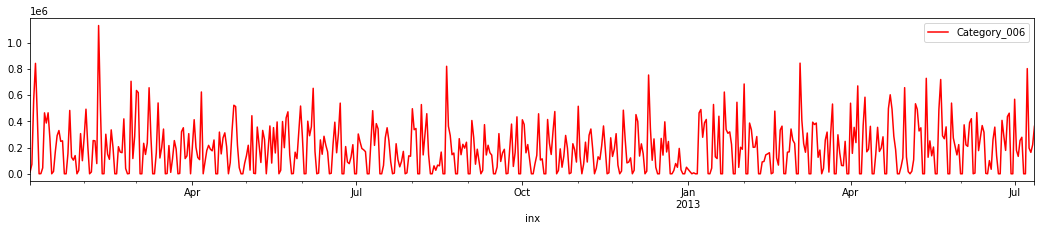

In [27]:
import matplotlib.pyplot as plt

dfnew[idx>'01-01-2012'].plot(kind='line',x='inx',y='Category_006',color='red',figsize=(18,3))
plt.show()

In [56]:
this_cat= 'Category_006'
st_dt = '01-01-2012'
dfnewer = dfnew[['inx',this_cat]].copy()
dfnewer = dfnewer.loc[idx>st_dt]
#print (dfnewer.shape)
#print (dfnewer.head)
narray = dfnewer[this_cat].to_numpy()
ndates = dfnewer['inx']
print(ndates.shape)
#narray

(558,)


/usr/local/lib/python3.6/dist-packages/numpy/core/_asarray.py:85: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


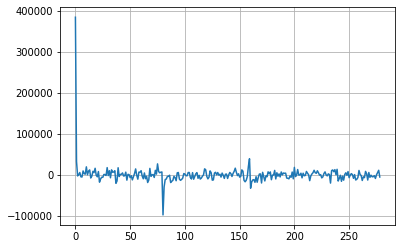

80
480
(480,)


In [69]:
from scipy.fftpack import fft
# Number of samplepoints
N = int(558)
# sample spacing
T = 1.0 / N
#x=np.linspace(0.0, N*T, N)
#y = np.sin(50.0 * 2.0*np.pi*x) + 0.5*np.sin(80.0 * 2.0*np.pi*x)
yf = fft(narray)
xf= int(len(yf)/2)
#xf = np.linspace(0.0, 1.0/(2.0*T), HN)
import matplotlib.pyplot as plt
plt.plot(range(xf),(2.0/N)*yf[0:xf])
plt.grid()
plt.show()
rep_int = np.argmin(yf)
kept_idx = (len(narray)//rep_int)*rep_int
narray = narray [len(narray)-kept_idx:]
print(np.argmin(yf))
print (kept_idx)
print(narray.shape)

Now we will convert the format of our dataset to what gluon-ts requires


In [51]:
from gluonts.dataset.common import ListDataset

In [ ]:
from gluonts.dataset.field_names import FieldName
[f"FieldName.{k} = '{v}'" for k, v in FieldName.__dict__.items() if not k.startswith('_')]


In [195]:

n_series = dfnewer.shape[0]//rep_int
total_len = rep_int * n_series
print(nu_ser)
print(dfnewer.head)
start_date = dfnewer['inx'].min()
print (n_series)

6
<bound method NDFrame.head of                   inx  Category_006
2012-01-02 2012-01-02         13000
2012-01-03 2012-01-03         72400
2012-01-04 2012-01-04        563000
2012-01-05 2012-01-05        843602
2012-01-06 2012-01-06        445723
...               ...           ...
2013-07-08 2013-07-08        803601
2013-07-09 2013-07-09        196212
2013-07-10 2013-07-10        163503
2013-07-11 2013-07-11        221811
2013-07-12 2013-07-12        363108

[558 rows x 2 columns]>
6


In [84]:
date_rng = pd.date_range(start=st_dt, periods = total_len , freq='D')

In [ ]:
#sample['PR'] = sample['PR'].apply(lambda x: 'NaN' if x < 90 else x) 
#pd.Timestamp("01-01-2019", freq='1H')
ts['inx'] = ts['inx'].apply(lambda x: pd.Timestamp(x, freq='1D'))

In [190]:
print(ts.info)

<bound method DataFrame.info of                   inx
2011-01-08 2011-01-08
2011-01-09 2011-01-09
2011-01-10 2011-01-10
2011-01-11 2011-01-11
2011-01-12 2011-01-12
...               ...
2013-07-08 2013-07-08
2013-07-09 2013-07-09
2013-07-10 2013-07-10
2013-07-11 2013-07-11
2013-07-12 2013-07-12

[917 rows x 1 columns]>


In [224]:
data_rng_series = ts['inx']
print(type(data_rng_series))
date_rng_lst = [data_rng_series.iloc[i*rep_int] for i in range(n_series)]
#print(type(date_rng_lst))
print(len(date_rng_lst))
print(date_rng_lst[0:3])

<class 'pandas.core.series.Series'>
6
[Timestamp('2011-01-08 00:00:00'), Timestamp('2011-03-29 00:00:00'), Timestamp('2011-06-17 00:00:00')]


In [ ]:
date_rng_np = np.array(date_rng).reshape((n_series,rep_int))
date_rng_np
print(type(date_rng_np[0,0]))

In [239]:
cus_ds_meta = {'num_series': nu_ser,
                      'num_steps': 80,
                      'prediction_length': 20,
                      'freq': '1D',
                      'start': [pd.Timestamp(start_date, freq='1D') for _ in range(nu_ser)]
                     }
print (cus_ds_meta.items())

dict_items([('num_series', 6), ('num_steps', 80), ('prediction_length', 20), ('freq', '1D'), ('start', [Timestamp('2012-01-02 00:00:00', freq='D'), Timestamp('2012-01-02 00:00:00', freq='D'), Timestamp('2012-01-02 00:00:00', freq='D'), Timestamp('2012-01-02 00:00:00', freq='D'), Timestamp('2012-01-02 00:00:00', freq='D'), Timestamp('2012-01-02 00:00:00', freq='D')])])


In [238]:
print (target.shape)

(6, 80)


In [248]:
mtarget = target [:,:cus_ds_meta['prediction_length']]
mstart = cus_ds_meta['start']
mfreq = custom_ds_metadata['freq']
train_ds = ListDataset([{FieldName.TARGET: target ,FieldName.START: start} for target , start in zip(mtarget,mstart)],freq=mfreq)

In [284]:
train_ds = ListDataset([{FieldName.TARGET: target[:, :-cus_ds_meta['prediction_length']],
                         FieldName.START: cus_ds_meta['start']}],
                       freq=cus_ds_meta['freq'])

In [288]:
train_ds = ListDataset([{FieldName.TARGET: target,
                         FieldName.START: start,
                         FieldName.FEAT_DYNAMIC_REAL: [fdr],
                         FieldName.FEAT_STATIC_CAT: [fsc]}
                        for (target, start, fdr, fsc) in zip(target[:, :-cus_ds_meta['prediction_length']],
                                                             cus_ds_meta['start'],
                                                             feat_dynamic_real[:, :-cus_ds_meta['prediction_length']],
                                                             feat_static_cat)],
                      freq=custom_ds_metadata['freq'])

In [285]:
test_ds = ListDataset([{FieldName.TARGET: target,
                         FieldName.START: cus_ds_meta['start']}],
                       freq=cus_ds_meta['freq'])

In [289]:
test_ds = ListDataset([{FieldName.TARGET: target,
                        FieldName.START: start,
                        FieldName.FEAT_DYNAMIC_REAL: [fdr],
                        FieldName.FEAT_STATIC_CAT: [fsc]}
                       for (target, start, fdr, fsc) in zip(target,
                                                            cus_ds_meta['start'],
                                                            feat_dynamic_real,
                                                            feat_static_cat)],
                     freq=cus_ds_meta['freq'])

In [ ]:
test_entry = next(iter(test_ds))
test_entry.values()

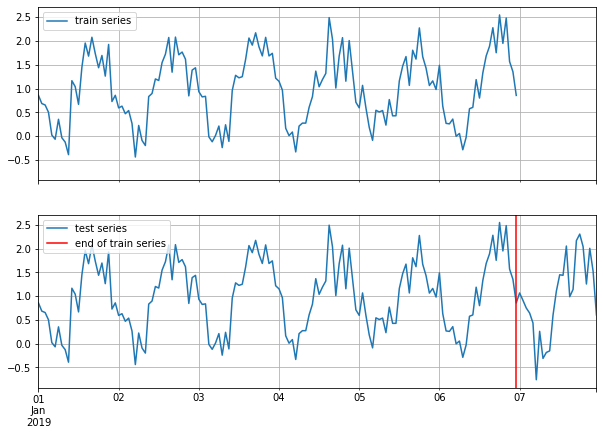

In [290]:
test_series = to_pandas(test_entry)
train_series = to_pandas(train_entry)

fig, ax = plt.subplots(2, 1, sharex=True, sharey=True, figsize=(10, 7))

train_series.plot(ax=ax[0])
ax[0].grid(which="both")
ax[0].legend(["train series"], loc="upper left")

test_series.plot(ax=ax[1])
ax[1].axvline(train_series.index[-1], color='r') # end of train dataset
ax[1].grid(which="both")
ax[1].legend(["test series", "end of train series"], loc="upper left")

plt.show()

In [146]:

from gluonts.model.simple_feedforward import SimpleFeedForwardEstimator
from gluonts.trainer import Trainer

In [155]:
estimator = SimpleFeedForwardEstimator(
    num_hidden_dimensions=[10],
    prediction_length=cus_ds_meta['prediction_length'],
    context_length=2*cus_ds_meta['prediction_length'],
    freq=cus_ds_meta['freq'],
    trainer=Trainer(ctx="cpu",
                    epochs=5,
                    learning_rate=1e-3,
                    hybridize=False,
                    num_batches_per_epoch=100
                   )
)

In [187]:
print (type(train_ds))


gluonts.dataset.common.ListDataset


In [291]:
predictor = estimator.train(train_ds)

NameError: ignored

In [157]:
from gluonts.evaluation.backtest import make_evaluation_predictions

In [158]:
forecast_it, ts_it = make_evaluation_predictions(
    dataset=test_ds,  # test dataset
    predictor=predictor,  # predictor
    num_samples=20,  # number of sample paths we want for evaluation
)

In [160]:
forecasts = list(forecast_it)
tss = list(ts_it)

In [171]:
# first entry of the time series list
ts_entry = tss[5]
print(ts_entry)

                   0
2012-01-02  493906.0
2012-01-03  286801.0
2012-01-04  184020.0
2012-01-05       0.0
2012-01-06       0.0
...              ...
2012-03-17  803601.0
2012-03-18  196212.0
2012-03-19  163503.0
2012-03-20  221811.0
2012-03-21  363108.0

[80 rows x 1 columns]


In [167]:
def plot_prob_forecasts(ts_entry, forecast_entry):
    plot_length = 250
    prediction_intervals = (50.0, 90.0)
    legend = ["observations", "median prediction"] + [f"{k}% prediction interval" for k in prediction_intervals][::-1]

    fig, ax = plt.subplots(1, 1, figsize=(10, 7))
    ts_entry[-plot_length:].plot(ax=ax)  # plot the time series
    forecast_entry.plot(prediction_intervals=prediction_intervals, color='g')
    plt.grid(which="both")
    plt.legend(legend, loc="upper left")
    plt.show()

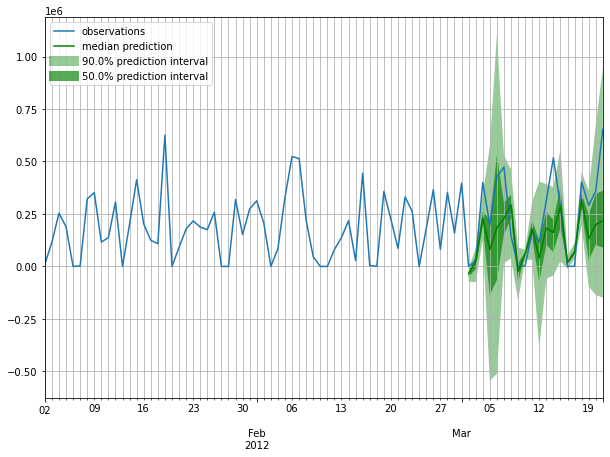

In [168]:
forecast_entry = forecasts[0]
plot_prob_forecasts(ts_entry, forecast_entry)

the following is experiment and needs to be removed


In [97]:
a = np.array(range(16)).reshape((4,4))
a[:,2]


array([ 2,  6, 10, 14])

In [252]:
def create_dataset(num_series, num_steps, period=24, mu=1, sigma=0.3):
    # create target: noise + pattern
    # noise
    noise = np.random.normal(mu, sigma, size=(num_series, num_steps))

    # pattern - sinusoid with different phase
    sin_minumPi_Pi = np.sin(np.tile(np.linspace(-np.pi, np.pi, period), int(num_steps / period)))
    sin_Zero_2Pi = np.sin(np.tile(np.linspace(0, 2 * np.pi, 24), int(num_steps / period)))

    pattern = np.concatenate((np.tile(sin_minumPi_Pi.reshape(1, -1),
                                      (int(np.ceil(num_series / 2)),1)),
                              np.tile(sin_Zero_2Pi.reshape(1, -1),
                                      (int(np.floor(num_series / 2)), 1))
                             ),
                             axis=0
                            )

    target = noise + pattern

    # create time features: use target one period earlier, append with zeros
    feat_dynamic_real = np.concatenate((np.zeros((num_series, period)),
                                        target[:, :-period]
                                       ),
                                       axis=1
                                      )

    # create categorical static feats: use the sinusoid type as a categorical feature
    feat_static_cat = np.concatenate((np.zeros(int(np.ceil(num_series / 2))),
                                      np.ones(int(np.floor(num_series / 2)))
                                     ),
                                     axis=0
                                    )

    return target, feat_dynamic_real, feat_static_cat

In [253]:
custom_ds_metadata = {'num_series': 100,
                      'num_steps': 24 * 7,
                      'prediction_length': 24,
                      'freq': '1H',
                      'start': [pd.Timestamp("01-01-2019", freq='1H')
                                for _ in range(100)]
                     }

In [261]:

data_out = create_dataset(custom_ds_metadata['num_series'],
                          custom_ds_metadata['num_steps'],
                          custom_ds_metadata['prediction_length']
                         )

target, feat_dynamic_real, feat_static_cat = data_out

In [262]:

train_ds = ListDataset([{FieldName.TARGET: target,
                         FieldName.START: start,
                         FieldName.FEAT_DYNAMIC_REAL: [fdr],
                         FieldName.FEAT_STATIC_CAT: [fsc]}
                        for (target, start, fdr, fsc) in zip(target[:, :-custom_ds_metadata['prediction_length']],
                                                             custom_ds_metadata['start'],
                                                             feat_dynamic_real[:, :-custom_ds_metadata['prediction_length']],
                                                             feat_static_cat)],
                      freq=custom_ds_metadata['freq'])

In [266]:
test_ds = ListDataset([{FieldName.TARGET: target,
                        FieldName.START: start,
                        FieldName.FEAT_DYNAMIC_REAL: [fdr],
                        FieldName.FEAT_STATIC_CAT: [fsc]}
                       for (target, start, fdr, fsc) in zip(target,
                                                            custom_ds_metadata['start'],
                                                            feat_dynamic_real,
                                                            feat_static_cat)],
                     freq=custom_ds_metadata['freq'])

In [256]:
train_entry = next(iter(train_ds))
train_entry.keys()

dict_keys(['target', 'start', 'feat_dynamic_real', 'feat_static_cat', 'source'])

In [ ]:
for x in target[:, :-5]:
  print (x)

In [264]:
for i in range(3):
  train_entry = next(iter(train_ds))
  print(train_entry.keys())
  print(train_entry['target'].shape)

dict_keys(['target', 'start', 'feat_dynamic_real', 'feat_static_cat', 'source'])
(144,)
dict_keys(['target', 'start', 'feat_dynamic_real', 'feat_static_cat', 'source'])
(144,)
dict_keys(['target', 'start', 'feat_dynamic_real', 'feat_static_cat', 'source'])
(144,)


In [300]:
test_entry = next(iter(test_ds))
test_entry.keys()

dict_keys(['target', 'start', 'feat_dynamic_real', 'feat_static_cat', 'source'])

In [ ]:
for i in range(1):
  test_entry = next(iter(test_ds))
  print(test_entry.keys())
print(test_entry['target'])
test_entry = next(iter(test_ds))
print('h')
print(test_entry['source'])
print(test_ds[0])

In [299]:
ssss=('2','4','5','5','66')
myit = iter(ssss)
print(next(myit))
print(next(myit))
print(next(myit))


2
4
5
